In [26]:
# Pandas helps us manage data in a tabular dataframe
import pandas as pd
# Numpy helps with math and stats functions
import numpy as np
# Matplot helps with plotting
import matplotlib.pyplot as plt
import seaborn as sns
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [27]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
print_full(train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

<BarContainer object of 10 artists>

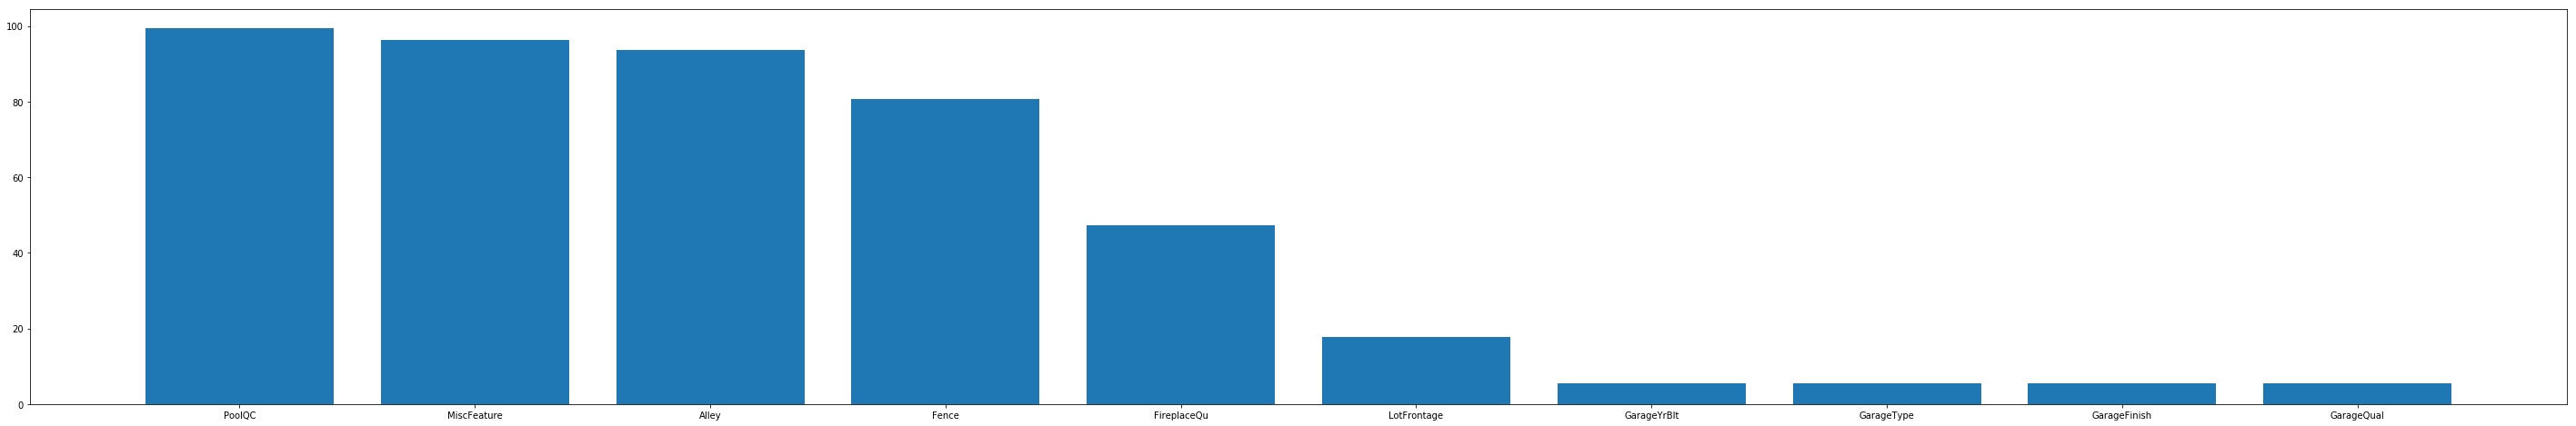

In [35]:
null_data = (train.isnull().sum() / len(train)) * 100
null_data = null_data.drop(null_data[null_data == 0].index).sort_values(ascending=False)[:10]
plt.figure(figsize=(50, 8)) 
plt.bar(range(len(null_data)), null_data,tick_label=null_data.index)

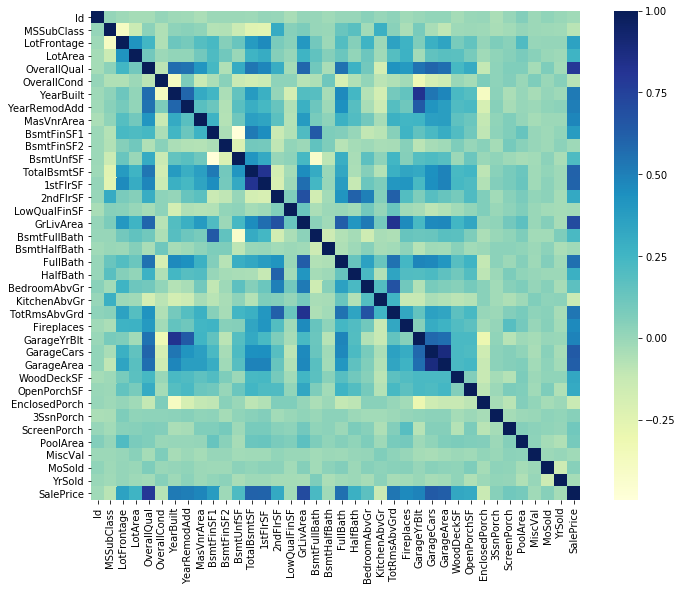

In [29]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=True,cmap='YlGnBu')

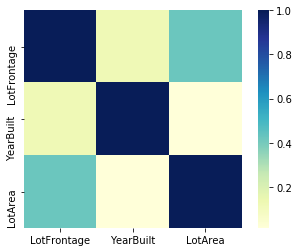

In [36]:
data_sub1 = train[['LotFrontage','YearBuilt','LotArea']]
corr_sub1 = data_sub1.corr()
sns.heatmap(corr_sub1,square=True,cmap='YlGnBu')

In [37]:
print_full(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [38]:
for column in train.columns:
    if train[column].dtypes == 'object':
        train[column] = train[column].astype('category')

In [39]:
train['LotFrontage'] = train['LotFrontage'].fillna(0.0)

train['Alley'] = train['Alley'].astype('category')
train['Alley'] = train['Alley'].cat.add_categories("none").fillna("none")
# cat_map = dict( zip( train['Alley'].cat.codes, train['Alley'] ) )

cat_columns = train.select_dtypes(['category']).columns
train[cat_columns] = train[cat_columns].apply(lambda x: x.cat.codes)

In [40]:
miss_columns = {}
for column in train.columns:
    bool_series = pd.isnull(train[column])
    if train[bool_series].shape[0] > 0:
        miss_columns[column] = train[bool_series].shape[0]
print(miss_columns)

{'MasVnrArea': 8, 'GarageYrBlt': 81}


In [13]:
train['Alley'].dtype

dtype('int8')

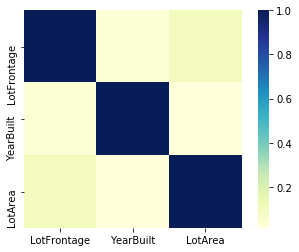

In [41]:
data_sub1 = train[['LotFrontage','YearBuilt','LotArea']]
corr_sub1 = data_sub1.corr()
sns.heatmap(corr_sub1,square=True,cmap='YlGnBu')